In [1]:
import numpy as np
from mayavi import mlab
import matplotlib.pyplot as plt

In [6]:
x = np.linspace(-1.8,1.8,500)
y = np.linspace(-1,-0.3,500)

xx, yy = np.meshgrid(x,y)

def zz(xx,yy):
    return xx**2*(yy+0.4*np.abs(xx))**2 +0.05*(xx-1)**2*(xx+1)**2
def post_process(zz,zlim=0.5):
    mask = zz > zlim
    zz[mask] = np.nan
    return zz

y_offset = -0.65
x_offset = -1

In [9]:
mlab.mesh(xx.T,yy.T,post_process(zz(xx.T,yy.T)),opacity=1)
mlab.contour_surf(xx.T,yy.T,post_process(zz(xx.T,yy.T)),contours=10,color=(0,0,0))
mlab.plot3d(x,[y_offset for _ in range(500)],zz(x,y_offset),color=(1,0,0))
mlab.plot3d([-x_offset for _ in range(500)],y,zz(x_offset,y),color=(0,0,0))
# mlab.mesh(xx.T,yy.T,-zz(xx.T,-0.65) + np.abs(yy.T)*np.abs(dzdy(xx.T,-0.65)),opacity=0.5,color=(0.3,0.3,0.3))
# mlab.axes(#extent=[-1.5,1.5,-1,0,0,0],
#           ranges=[None for _ in range(6)],
#           nb_labels=0,
#           xlabel=r"$p$",
#           ylabel=r"$a$",
#           zlabel=r"")
mlab.show()

In [140]:
def dzdy(x,y):
    return 2*x**2*(y+0.4*np.abs(x))

In [181]:
np.linspace(0,0.25,5)

array([0.    , 0.0625, 0.125 , 0.1875, 0.25  ])

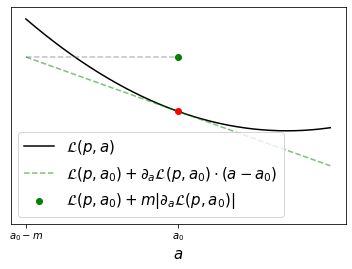

In [343]:
fig, ax = plt.subplots()
# x_offset = -1
ax.plot(y,zz(x_offset,y),color="k",label=r"$\mathcal{L}(p,a)$")
ax.scatter(y_offset,zz(x_offset,y_offset),color="r",zorder=5)#,label=r"$\mathcal{L}(p,a_0)$")
ax.plot([-1,y_offset],[(-1-y_offset)*dzdy(x_offset,y_offset) + zz(x_offset,y_offset),(-1-y_offset)*dzdy(x_offset,y_offset) + zz(x_offset,y_offset)],color="grey",ls="--",alpha=0.5)
ax.scatter(y_offset,(-1-y_offset)*dzdy(x_offset,y_offset) + zz(x_offset,y_offset),color="g",label=r"$\mathcal{L}(p,a_0) + m|\partial_a\mathcal{L}(p,a_0)|$")
ax.plot(y,(y-y_offset)*dzdy(x_offset,y_offset) + zz(x_offset,y_offset),color="g",alpha=0.5,ls="--",label=r"$\mathcal{L}(p,a_0) + \partial_a\mathcal{L}(p,a_0)\cdot(a-a_0)$")
ax.legend(fontsize=15,loc="lower left")
ax.set_ylim(-0.3,0.4)
ax.set_yticks([-10])
ax.set_yticklabels([None]) ;
ax.set_xticks([-1,y_offset])
ax.set_xticklabels([r"$a_0 - m$",r"$a_0$"]) ;
ax.set_xlabel(r"$a$",fontsize=15)
# fig.savefig("LossLandscape_figs/a_axis_robust.pdf")

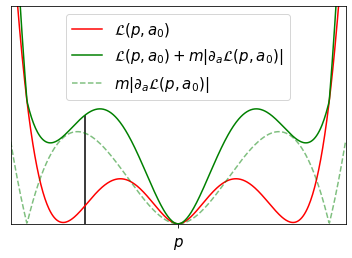

In [335]:
fig, ax = plt.subplots()
# ax.plot(x,zz(x,-0.6))
# for m in [0,0.125]:#np.linspace(0,0.25,5):
#     ax.plot(x,zz(x,-0.65) + m*np.abs(dzdy(x,-0.65)))
ax.plot(x,zz(x,y_offset) + 0*np.abs(dzdy(x,y_offset)),c="r",label=r"$\mathcal{L}(p,a_0)$")
ax.plot(x,zz(x,y_offset) + 0.125*np.abs(dzdy(x,y_offset)),c="g",label=r"$\mathcal{L}(p,a_0) + m|\partial_a\mathcal{L}(p,a_0)|$")
ax.plot(x,0.125*np.abs(dzdy(x,y_offset))+0.05,color="g",alpha=0.5,ls="--",label=r"$m|\partial_a\mathcal{L}(p,a_0)|$")
ax.vlines(x_offset,0,0.125,color="k",alpha=1,zorder=-1)
ax.set_ylim(0.05,0.2)
ax.set_xlim(-1.8,1.8)
ax.set_yticks([0])
ax.set_yticklabels([None]) ;
ax.set_xticks([0])
ax.set_xticklabels([None]) ;
ax.set_xlabel(r"$p$",fontsize=15)
ax.legend(fontsize=15)

In [271]:
# fig.savefig("LossLandscape_figs/RobustCorrected.pdf")